In [54]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [56]:
path = 'dataset/Training/'
glioma_tumor = Image.open(path + 'glioma_tumor/gg (1).jpg')
meningioma_tumor=Image.open(path +'meningioma_tumor/m (10).jpg')
no_tumor =Image.open(path + 'no_tumor/1.jpg')
pituitary_tumor =Image.open(path + 'pituitary_tumor/p (1).jpg')

In [48]:
train_data = keras.utils.image_dataset_from_directory(
    directory='dataset/Training',
    labels='inferred',
    label_mode='categorical',
    batch_size = 10,
    image_size=(256,256)
)
test_data = keras.utils.image_dataset_from_directory(
    directory='dataset/Testing',
    labels='inferred',
    label_mode='categorical',
    batch_size = 10,
    image_size=(256,256)
)

Found 2870 files belonging to 4 classes.
Found 394 files belonging to 4 classes.


In [52]:
labels = train_data.class_names
print(labels)

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


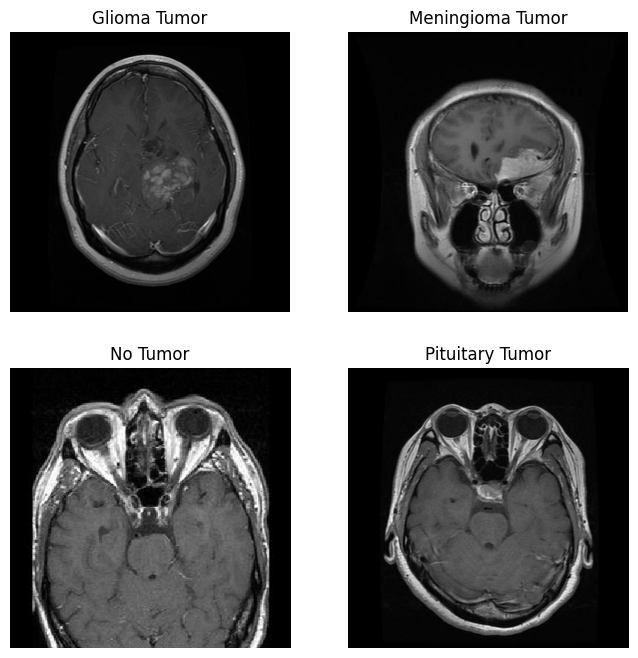

In [60]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))


axes[0, 0].imshow(glioma_tumor)
axes[0, 0].set_title("Glioma Tumor")

axes[0, 1].imshow(meningioma_tumor)
axes[0, 1].set_title("Meningioma Tumor")

axes[1, 0].imshow(no_tumor)
axes[1, 0].set_title("No Tumor")

axes[1, 1].imshow(pituitary_tumor)
axes[1, 1].set_title("Pituitary Tumor")

# Remove axis labels and ticks for cleaner visualization
for ax in axes.ravel():
    ax.axis("off")


In [4]:
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,BatchNormalization,Dropout,Activation,MaxPooling2D
from keras import Sequential

In [5]:
model = Sequential()

In [6]:
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(BatchNormalization())
model.add(Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='same'))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.40))
model.add(Dense(128,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [7]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 64)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 127, 127, 64)     256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 128)      0         
 2D)                                                             
                                                        

In [8]:
model.fit(train_data,epochs=10,validation_data=test_data)

Epoch 1/10
287/287 [==============================] - 55s 147ms/step - loss: 2.0324 - accuracy: 0.4916 - val_loss: 1.9851 - val_accuracy: 0.3223
Epoch 2/10
287/287 [==============================] - 40s 139ms/step - loss: 0.8390 - accuracy: 0.6589 - val_loss: 1.7599 - val_accuracy: 0.4086
Epoch 3/10
287/287 [==============================] - 40s 141ms/step - loss: 0.6375 - accuracy: 0.7456 - val_loss: 2.1311 - val_accuracy: 0.3477
Epoch 4/10
287/287 [==============================] - 41s 144ms/step - loss: 0.5402 - accuracy: 0.7944 - val_loss: 2.1871 - val_accuracy: 0.3452
Epoch 5/10
287/287 [==============================] - 41s 144ms/step - loss: 0.4508 - accuracy: 0.8293 - val_loss: 2.4867 - val_accuracy: 0.4467
Epoch 6/10
287/287 [==============================] - 42s 145ms/step - loss: 0.3841 - accuracy: 0.8526 - val_loss: 3.3470 - val_accuracy: 0.4695
Epoch 7/10
287/287 [==============================] - 42s 145ms/step - loss: 0.3131 - accuracy: 0.8721 - val_loss: 2.2175 - val_ac

In [10]:
import tensorflow as tf

In [11]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [12]:
from keras.applications.vgg16 import VGG16

In [28]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

In [29]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [36]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(256,activation='relu'))
model.add(Dense(4,activation='softmax'))

input_2 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [40]:
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),loss='categorical_crossentropy',metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_9 (Dense)             (None, 256)               2097408   
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               65792     
                                                                 
 dense_11 (Dense)            (None, 4)                 1028      
                                                                 
Total params: 16,878,916
Trainable params: 9,243,652
N

In [42]:
from keras.preprocessing.image import ImageDataGenerator
import os
import cv2
from tqdm import tqdm
from sklearn.model_selection import train_test_split

classes = os.listdir("dataset/Training")

X = []
y = []
image_size = 150
for i in classes:
    folderPath = os.path.join('dataset/Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X.append(img)
        y.append(i)
        
for i in classes:
    folderPath = os.path.join('dataset/Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X.append(img)
        y.append(i)
        
X = np.array(X)
y = np.array(y)

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

100%|█████████████████████████████████████████████████████████████████████████████████| 74/74 [00:00<00:00, 318.00it/s]


In [43]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        'dataset/Training',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        'dataset/Testing',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [46]:
model.fit(
        train_generator,
        epochs=20,
        validation_data=validation_generator
)

Epoch 1/20
90/90 [==============================] - 14s 155ms/step - loss: 0.0508 - accuracy: 0.9819 - val_loss: 1.9277 - val_accuracy: 0.7766
Epoch 2/20
90/90 [==============================] - 13s 147ms/step - loss: 0.0464 - accuracy: 0.9815 - val_loss: 2.4045 - val_accuracy: 0.7690
Epoch 3/20
90/90 [==============================] - 13s 146ms/step - loss: 0.0406 - accuracy: 0.9864 - val_loss: 2.1341 - val_accuracy: 0.7640
Epoch 4/20
90/90 [==============================] - 13s 144ms/step - loss: 0.0503 - accuracy: 0.9808 - val_loss: 2.1700 - val_accuracy: 0.7513
Epoch 5/20
90/90 [==============================] - 13s 144ms/step - loss: 0.0521 - accuracy: 0.9829 - val_loss: 2.4073 - val_accuracy: 0.7360
Epoch 6/20
90/90 [==============================] - 13s 148ms/step - loss: 0.0454 - accuracy: 0.9854 - val_loss: 2.4125 - val_accuracy: 0.7538
Epoch 7/20
90/90 [==============================] - 14s 154ms/step - loss: 0.0381 - accuracy: 0.9875 - val_loss: 2.6718 - val_accuracy: 0.7437